### Makemore is a character level language model

In [2]:
words = open('names.txt').read().splitlines()

words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import torch

In [9]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}

stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

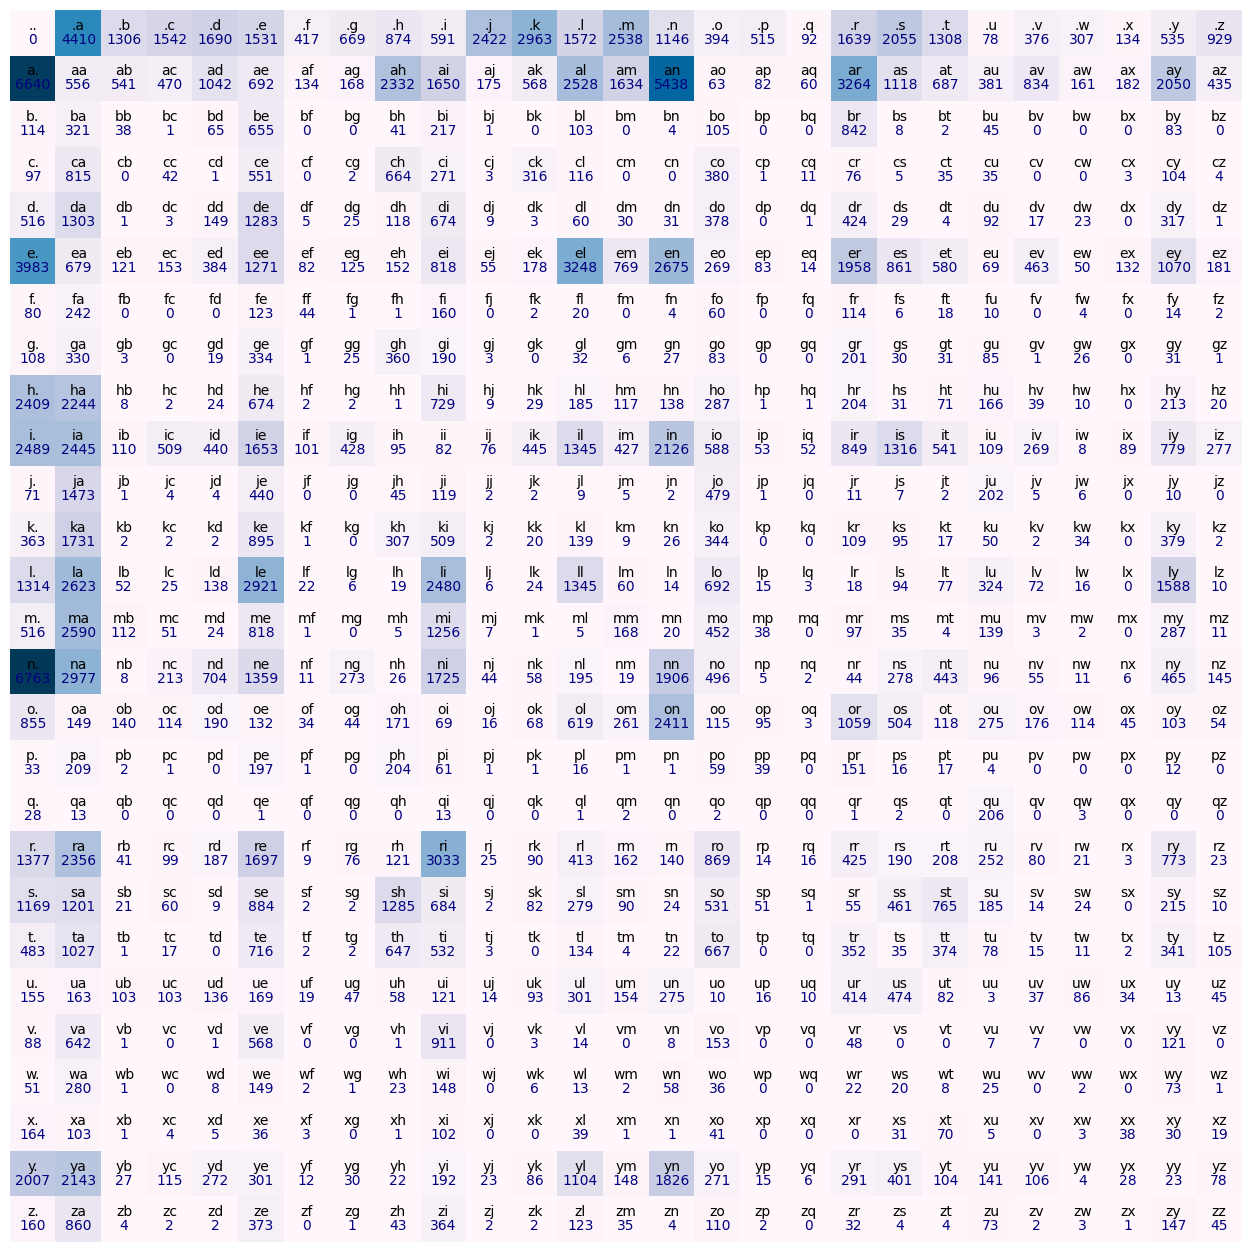

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='PuBu')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center',va='bottom', color='black')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='navy')
plt.axis('off')

In [13]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [14]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [15]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [16]:
g = torch.Generator().manual_seed(2147483647)
test_p = torch.rand(3, generator=g)
test_p = test_p / test_p.sum()
test_p

tensor([0.6064, 0.3033, 0.0903])

In [20]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

**Broadcast rules are important**

In [33]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [34]:
P[0].sum()

tensor(1.)

In [35]:
# trained model, bigram

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


**Bigram Language models are really terrible**

In [36]:
# Untrained model, everything is qually likely

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p = p / p.sum()
        p = torch.ones(27) / 27
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

juwjdvdipkcqaz.
p.
cfqywocnzqfjiirltozcogsjgwzvudlhnpauyjbilevhajkdbduinrwibtlzsnjyievyvaftbzffvmumthyfodtumjrpfytszwjhrjagq.
coreaysezocfkyjjabdywejfmoifmwyfinwagaasnhsvfihofszxhddgosfmptpagicz.
rjpiufmthdt.


In [146]:
log_likelihood = 0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob: .4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
nll/n=tensor(2.4544)


In [ ]:
# Goal is to maximize likelihood wrt model parameters
# equivalent to maximizing the log likelihood
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the avg negative log likelihood

### Neural Network setup for the same bigram character level language model

In [56]:
# create the training set of all the bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [57]:
xs

tensor([ 0,  5, 13, 13,  1])

In [58]:
ys

tensor([ 5, 13, 13,  1,  0])

In [62]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()
xenc.shape

torch.Size([5, 27])

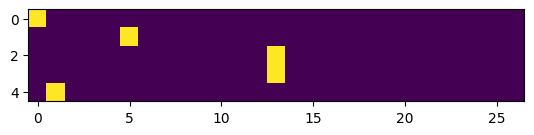

In [63]:
plt.imshow(xenc)

In [64]:
xenc.dtype

torch.float32

In [70]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.4267,  1.7236, -0.3817,  0.6155,  0.1743, -0.3370, -1.3466,  0.1388,
          0.7042,  1.0106, -0.7781,  1.5465, -1.7068,  0.7036,  1.1480, -0.9367,
          1.3795, -0.2358, -0.9241, -1.1943,  0.0249,  0.3629, -1.8506, -0.8007,
         -0.3882, -2.1081,  0.1179],
        [-0.0262, -0.2008, -1.0290, -1.4089,  0.1576,  0.2912, -1.0925,  0.1313,
         -0.0860,  0.1302,  0.4551, -1.6327, -1.6584,  0.9680, -1.5802, -1.0141,
         -2.2854,  0.6559,  0.0942, -0.6212,  1.9861, -0.3409, -0.3403,  2.2392,
          2.2912, -0.5551, -1.2103],
        [ 1.8956,  0.9580, -0.6715,  0.5709,  1.8200,  0.9177,  2.1259, -1.3071,
         -1.0163,  0.4839,  0.4549,  0.7673,  0.4361, -0.3270, -0.3383, -0.5587,
         -0.3137,  0.4875,  0.0638, -0.6530, -1.4374, -0.8651,  0.9092, -1.0169,
          0.4568, -0.9452,  0.1441],
        [ 1.8956,  0.9580, -0.6715,  0.5709,  1.8200,  0.9177,  2.1259, -1.3071,
         -1.0163,  0.4839,  0.4549,  0.7673,  0.4361, -0.3270, -0.3383, -0.5587

In [74]:
logits = (xenc @ W) # log counts
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0171, 0.1466, 0.0179, 0.0484, 0.0311, 0.0187, 0.0068, 0.0301, 0.0529,
         0.0719, 0.0120, 0.1228, 0.0047, 0.0529, 0.0824, 0.0103, 0.1039, 0.0207,
         0.0104, 0.0079, 0.0268, 0.0376, 0.0041, 0.0117, 0.0177, 0.0032, 0.0294],
        [0.0211, 0.0177, 0.0077, 0.0053, 0.0254, 0.0290, 0.0073, 0.0247, 0.0199,
         0.0247, 0.0342, 0.0042, 0.0041, 0.0571, 0.0045, 0.0079, 0.0022, 0.0418,
         0.0238, 0.0116, 0.1580, 0.0154, 0.0154, 0.2035, 0.2144, 0.0124, 0.0065],
        [0.1367, 0.0535, 0.0105, 0.0363, 0.1267, 0.0514, 0.1721, 0.0056, 0.0074,
         0.0333, 0.0324, 0.0442, 0.0318, 0.0148, 0.0146, 0.0117, 0.0150, 0.0334,
         0.0219, 0.0107, 0.0049, 0.0086, 0.0510, 0.0074, 0.0324, 0.0080, 0.0237],
        [0.1367, 0.0535, 0.0105, 0.0363, 0.1267, 0.0514, 0.1721, 0.0056, 0.0074,
         0.0333, 0.0324, 0.0442, 0.0318, 0.0148, 0.0146, 0.0117, 0.0150, 0.0334,
         0.0219, 0.0107, 0.0049, 0.0086, 0.0510, 0.0074, 0.0324, 0.0080, 0.0237],
        [0.0072, 0.0076,

In [77]:
probs[0].shape

torch.Size([27])

In [78]:
probs[0].sum()

tensor(1.0000)

### Summary

In [79]:
xs

tensor([ 0,  5, 13, 13,  1])

In [80]:
ys

tensor([ 5, 13, 13,  1,  0])

In [95]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [96]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input for the network
logits = xenc @ W
# softmax function
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

In [97]:
probs.shape

torch.Size([5, 27])

In [98]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
 
    print('------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to nn:', x)
    print('output probabilities from the nn:', probs[i])
    print('label (actual next character): ', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character: ', p.item())
    logp = torch.log(p)
    print('log likelihood: ', logp.item())
    nll = -logp
    print('negative log likelihood: ', nll.item())
    nlls[i] = nll

print('==========')
print('average negative log likelihood, ie loss =', nlls.mean().item())    

------
bigram example 1: .e (indexes 0, 5)
input to nn: 0
output probabilities from the nn: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character):  5
probability assigned by the net to the correct character:  0.01228625513613224
log likelihood:  -4.399273872375488
negative log likelihood:  4.399273872375488
------
bigram example 2: em (indexes 5, 13)
input to nn: 5
output probabilities from the nn: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character):  13
probability assigned by the net to the correct character:  0.018050700426101685
log likelihood:  -4.01457

### Optimization

In [99]:
xs

tensor([ 0,  5, 13, 13,  1])

In [100]:
ys

tensor([ 5, 13, 13,  1,  0])

In [124]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [133]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input for the network
logits = xenc @ W
# softmax function
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [134]:
print(loss.item())

3.7291626930236816


In [131]:
# backward pass
W.grad = None # set grad to 0
loss.backward()

In [132]:
W.data += -0.1 * W.grad

### Optimization (Real one)

In [143]:
# create the training set of all the bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [147]:
(W**2).sum()

tensor(1536.7556, grad_fn=<SumBackward0>)

In [148]:
# gradient descent
for k in range(100):
    
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input for the network
    logits = xenc @ W
    # softmax function
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()

    print(loss.item())

    # backward pass
    W.grad = None # set grad to 0
    loss.backward()

    # update
    W.data += -50 * W.grad
    

2.4834256172180176
2.4833858013153076
2.4833483695983887
2.4833130836486816
2.4832799434661865
2.4832475185394287
2.4832167625427246
2.483186960220337
2.4831581115722656
2.4831299781799316
2.483103036880493
2.483076333999634
2.48305082321167
2.4830257892608643
2.483001232147217
2.4829773902893066
2.4829540252685547
2.48293137550354
2.4829089641571045
2.4828872680664062
2.482865571975708
2.4828450679779053
2.4828245639801025
2.482804298400879
2.4827845096588135
2.4827651977539062
2.48274564743042
2.48272705078125
2.482708692550659
2.4826905727386475
2.482672691345215
2.4826550483703613
2.482637643814087
2.4826202392578125
2.4826037883758545
2.4825873374938965
2.4825708866119385
2.4825544357299805
2.482538938522339
2.482523202896118
2.4825077056884766
2.482492446899414
2.4824774265289307
2.4824626445770264
2.482447862625122
2.482433557510376
2.48241925239563
2.4824047088623047
2.482390880584717
2.482377290725708
2.48236346244812
2.4823503494262695
2.4823367595672607
2.4823238849639893
2.

In [152]:
# generating predictions with neural nets

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0

    while True:
        # Before
        # p = P[ix]

        # After
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float() # input for the network
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
